In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("C:/Users/benysar/Documents/GitHub/BTB_extraction/src/output/BTB_structurated_raw.xlsx")
df.columns

Index(['Filename', 'IPP', 'Nom', 'Prénom', 'Date de naissance', 'Sexe',
       'Date de prélèvement', 'Technique', 'Niveaux de coupes', 'Site',
       'Nombre de fragment alvéolaire', 'Bronches/Bronchioles', 'Infiltrat',
       'Bronchiolite Lymphocytaire', 'Inflammation Lymphocytaire',
       'Bronchiolite oblitérante', 'Fibro-élastose interstitielle',
       'PNN dans les cloisons alvéolaires', 'Cellules mononucléées',
       'Dilatation des capillaires alvéolaires',
       'Œdème des cloisons alvéolaires',
       'Thrombi fibrineux dans les capillaires alvéolaires',
       'Débris cellulaires dans les cloisons alvéolaires',
       'Epaississement fibreux des cloisons alvéolaires',
       'Hyperplasie pneumocytaire', 'PNN dans les espaces alvéolaires',
       'Macrophages dans les espaces alvéolaires',
       'Bourgeons conjonctifs dans les espaces alvéolaires',
       'Hématies dans les espaces alvéolaires', 'Membranes hyalines',
       'Fibrine dans les espaces alvéolaires',
      

In [7]:
# Convert "Date de prélèvement" column to datetime format, ignoring errors
df["Date de prélèvement"] = pd.to_datetime(df["Date de prélèvement"], format='mixed', errors='coerce')

# Drop rows with NaT values (invalid dates)
df = df.dropna(subset=["Date de prélèvement"])

# Sort DataFrame by the "Date de prélèvement" column
df = df.sort_values(by="Date de prélèvement")

# Extract year from the "Date de prélèvement" column and create a new "Year" column
df['Year'] = df['Date de prélèvement'].dt.year


In [8]:
df["Year"].value_counts()

Year
2019    584
2016    556
2021    556
2022    533
2023    511
2012    481
2018    469
2017    466
2015    464
2013    460
2020    436
2014    424
2011    314
2010    237
2009    198
2007    187
2008    147
2006     71
2024     59
2005      3
2002      2
2004      1
Name: count, dtype: int64

In [9]:
df[df["Year"] == 2002]

,Filename,IPP,Nom,Prénom,Date de naissance,Sexe,Date de prélèvement,Technique,Niveaux de coupes,Site,...,BALT,Thrombus fibrino-cruorique,Nécrose ischémique,Inclusions virales,Agent pathogène,Eosinophilie (interstitielle/alvéolaire),Remodelage vasculaire,Matériel étranger d’inhalation,Conclusion,Year
6927,0300797105_5C772943-3A27-4F32-AEB1-728D5BEC0A4...,30079710,CHEVROT Pr,CHRISTIAN,26/12/1956,M,2002-12-12,HES,16,noncommuniqu,...,NON,NON,NON,NON,NON,NON,NON,NON,1/ Lavage bronchob alvolaire : ...,2002
6216,0300710706_B791288C-2644-40E0-B926-C1867D818D1...,30071070,PHILIPPEAU Pr,LAURENT,02/03/1966,M,2002-12-21,HES,16,NC,...,NON,NON,NON,NON,NON,NON,NON,NON,1. Lavage bronchiolo alvolaire : ...,2002


In [10]:
# Group by Year and calculate missing value proportion
missing_by_year = df.groupby('Year').apply(lambda x: x.isnull().mean()).drop('Year', axis=1)


C:\Users\benysar\AppData\Local\Temp\ipykernel_9800\3064211332.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_by_year = df.groupby('Year').apply(lambda x: x.isnull().mean()).drop('Year', axis=1)


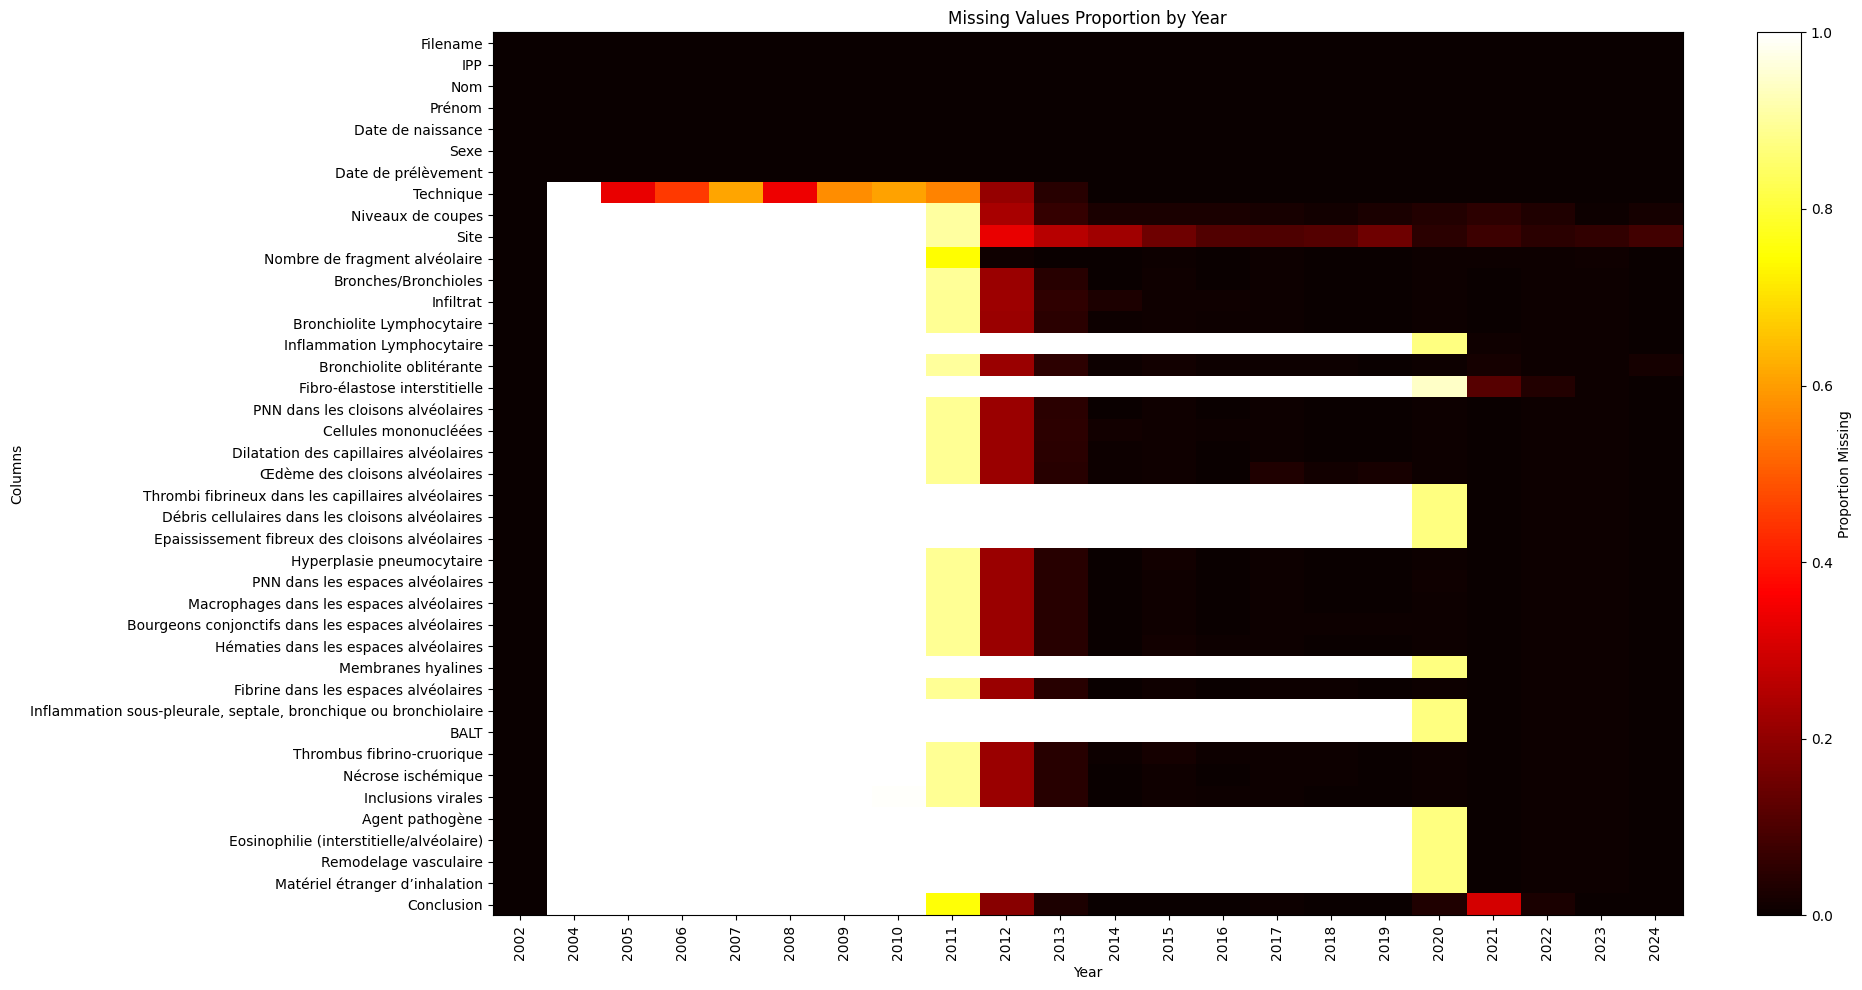

In [11]:

# Setting the figure size
plt.rcParams["figure.figsize"] = (20, 10)

# Preparing the plot
plt.imshow(missing_by_year.T, cmap='hot', aspect='auto')

# Customizing the plot with column names and years
plt.colorbar(label='Proportion Missing')
plt.xticks(ticks=np.arange(len(missing_by_year)), labels=missing_by_year.index)
plt.yticks(ticks=np.arange(len(missing_by_year.columns)), labels=missing_by_year.columns)

plt.title('Missing Values Proportion by Year')
plt.xlabel('Year')
plt.ylabel('Columns')

plt.xticks(rotation=90)  # Rotate year labels for better readability

plt.tight_layout()  # Adjust layout
plt.show()


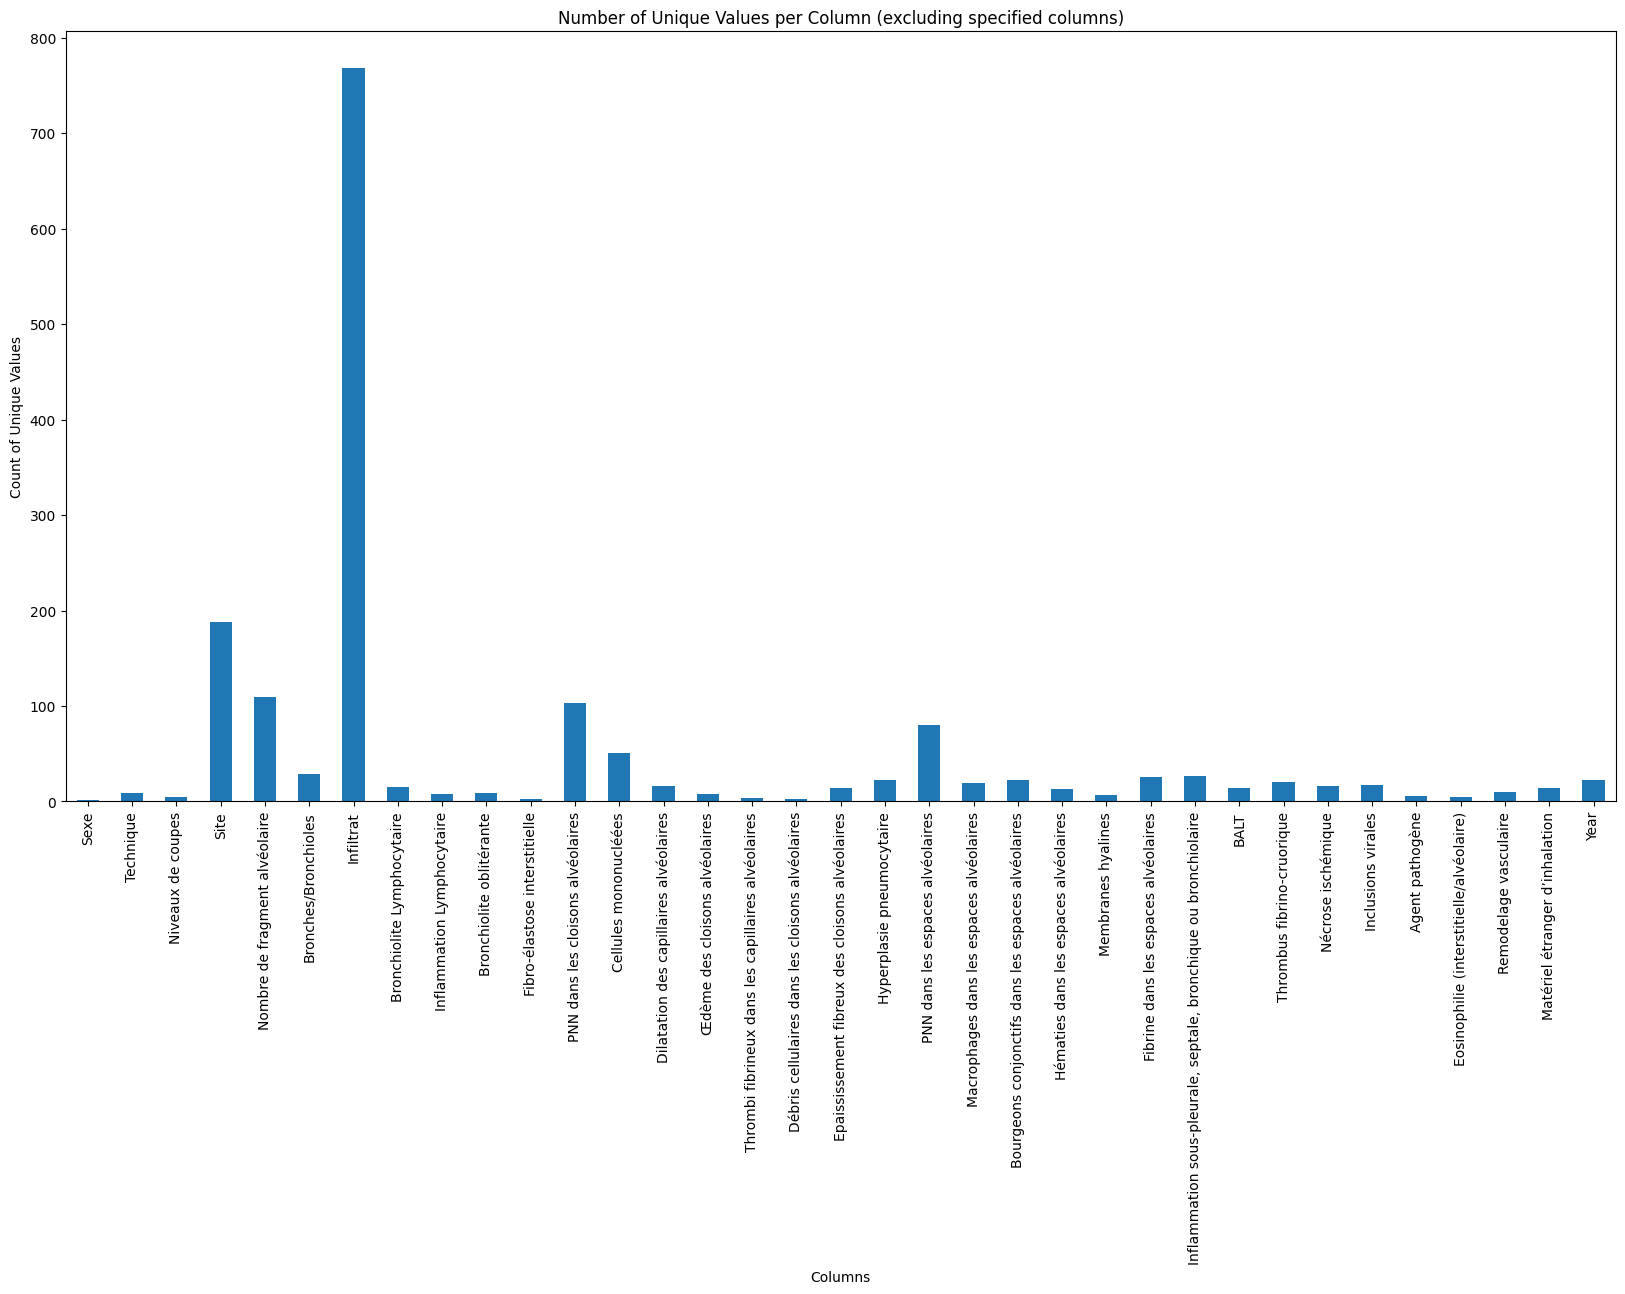

In [16]:
# Exclude specified columns from unique value visualization
columns_to_exclude = ['Filename', 'IPP', 'Nom', 'Prénom', 'Date de naissance', "Conclusion",'Date de prélèvement',]
columns_to_visualize = [col for col in df.columns if col not in columns_to_exclude]

# Calculate unique values count for the remaining columns
unique_values_count = df[columns_to_visualize].nunique()

# Plotting the bar chart
unique_values_count.plot(kind='bar')
plt.title('Number of Unique Values per Column (excluding specified columns)')
plt.xlabel('Columns')
plt.ylabel('Count of Unique Values')
plt.xticks(rotation=90)
plt.show()
